# 1. 인구 피라미드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 남자 데이터 출력
# 3개의 row는 무시하고 출력
# 인덱스는 행정기관
# usecols = 'B,E:Y' => df_m은  남성 데이터이므로 엑셀파일의 B 컬럼과 E ~ Y 컬럼 데이터가 필요함 
file_name = '202306_202307_연령별인구현황_월간.xlsx'
df_m = pd.read_excel(file_name, skiprows = 3, index_col = '행정기관' ,usecols = 'B,AY:BS') 
new_columns = [col.replace('.2', '') for col in df_m.columns] # 컬럼 이름에 있는 '.2라는 문자열을 파이썬 리스트 컴프리헨션으로 제거'
df_m.columns = new_columns
df_m.head()

C:\Users\user\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"702,534","1,047,595","1,204,238","1,202,800","1,483,510","1,802,343","1,772,633","1,650,414","2,060,648","1,998,857",...,"2,060,615","2,125,081","1,599,163","1,052,836","736,020","517,513","222,530","56,820","9,196","1,526"
서울특별시,"112,680","157,301","183,659","195,279","266,176","387,431","387,853","326,098","364,892","343,382",...,"337,594","344,872","276,800","189,936","139,951","96,167","38,484","9,846","1,759",337
부산광역시,"39,722","62,690","68,868","66,933","90,809","107,124","105,291","97,257","127,280","119,676",...,"125,961","143,099","121,457","84,647","57,430","38,269","14,190","3,218",461,72
대구광역시,"30,324","48,205","54,984","56,520","72,039","79,856","77,987","70,894","88,337","89,854",...,"98,561","100,095","73,650","51,767","33,120","24,485","10,227","2,430",332,32
인천광역시,"42,896","62,014","70,554","69,070","84,177","107,168","110,946","101,927","127,532","119,252",...,"121,513","126,802","88,145","53,240","36,668","23,525","9,875","2,565",459,106


In [3]:
# 우리는 전국 데이터만 필요하므로 전국 데이터의 천 자리 구분 콤마를 없애주고 astype으로 object형을 int형으로 전환함.
df_m.iloc[0] = df_m.iloc[0].str.replace(',','').astype(int) 
df_m

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,702534,1047595,1204238,1202800,1483510,1802343,1772633,1650414,2060648,1998857,...,2060615,2125081,1599163,1052836,736020,517513,222530,56820,9196,1526
서울특별시,"112,680","157,301","183,659","195,279","266,176","387,431","387,853","326,098","364,892","343,382",...,"337,594","344,872","276,800","189,936","139,951","96,167","38,484","9,846","1,759",337
부산광역시,"39,722","62,690","68,868","66,933","90,809","107,124","105,291","97,257","127,280","119,676",...,"125,961","143,099","121,457","84,647","57,430","38,269","14,190","3,218",461,72
대구광역시,"30,324","48,205","54,984","56,520","72,039","79,856","77,987","70,894","88,337","89,854",...,"98,561","100,095","73,650","51,767","33,120","24,485","10,227","2,430",332,32
인천광역시,"42,896","62,014","70,554","69,070","84,177","107,168","110,946","101,927","127,532","119,252",...,"121,513","126,802","88,145","53,240","36,668","23,525","9,875","2,565",459,106
광주광역시,"20,521","32,040","37,897","38,888","48,278","52,948","46,512","43,676","57,462","57,175",...,"54,891","51,013","36,204","24,979","18,214","12,700","5,230","1,262",191,18
대전광역시,"20,817","30,118","35,028","36,661","47,812","57,683","52,658","46,485","55,650","55,801",...,"55,197","55,693","41,683","26,936","17,978","12,468","5,404","1,461",220,33
울산광역시,"15,922","25,918","29,308","27,950","31,803","38,760","38,257","36,425","47,693","44,493",...,"51,401","50,098","34,473","21,310","12,226","7,377","2,545",596,76,6
세종특별자치시,"9,101","13,690","14,202","11,018","9,145","10,161","13,526","16,061","20,453","18,038",...,"11,448","10,665","7,690","4,735","2,904","1,995",939,242,46,6


In [4]:
df_m.iloc[0]

0~4세        702534
5~9세       1047595
10~14세     1204238
15~19세     1202800
20~24세     1483510
25~29세     1802343
30~34세     1772633
35~39세     1650414
40~44세     2060648
45~49세     1998857
50~54세     2296275
55~59세     2060615
60~64세     2125081
65~69세     1599163
70~74세     1052836
75~79세      736020
80~84세      517513
85~89세      222530
90~94세       56820
95~99세        9196
100세 이상       1526
Name: 전국  , dtype: object

In [5]:
# 여자 데이터 출력
file_name = '202306_202307_연령별인구현황_월간.xlsx'
df_w = pd.read_excel(file_name, skiprows = 3, index_col = '행정기관' ,usecols = 'B,BV:CP') 
df_w.head(3)
# 0~4세 ~~ 90~100세 컬럼이 df_m에도 있어서 .1이 붙음


C:\Users\user\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세.3,5~9세.3,10~14세.3,15~19세.3,20~24세.3,25~29세.3,30~34세.3,35~39세.3,40~44세.3,45~49세.3,...,55~59세.3,60~64세.3,65~69세.3,70~74세.3,75~79세.3,80~84세.3,85~89세.3,90~94세.3,95~99세.3,100세 이상.3
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"668,002","996,988","1,139,500","1,128,347","1,367,294","1,631,088","1,603,504","1,561,485","1,989,572","1,939,714",...,"2,034,950","2,155,144","1,692,243","1,192,168","926,551","809,463","476,241","183,063","41,734","7,476"
서울특별시,"105,997","150,166","174,195","188,066","300,568","418,845","386,143","327,460","370,620","352,663",...,"352,571","375,563","316,645","223,912","174,625","129,916","68,924","26,034","6,431","1,161"
부산광역시,"37,879","59,363","65,337","63,421","86,276","100,968","97,419","93,314","124,478","117,749",...,"135,171","159,765","136,979","100,886","72,367","57,551","29,640","10,611","2,516",382


In [6]:
# 여자의 컬럼 이름을 남자의 컬럼 이름으로 치환
df_w.columns = df_m.columns 

In [7]:
# 남자 데이터와 마찬가지로 ,를 제거하고 int 타입으로 변경함.
df_w.iloc[0] = df_w.iloc[0].str.replace(',','').astype(int) 
df_w

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,668002,996988,1139500,1128347,1367294,1631088,1603504,1561485,1989572,1939714,...,2034950,2155144,1692243,1192168,926551,809463,476241,183063,41734,7476
서울특별시,"105,997","150,166","174,195","188,066","300,568","418,845","386,143","327,460","370,620","352,663",...,"352,571","375,563","316,645","223,912","174,625","129,916","68,924","26,034","6,431","1,161"
부산광역시,"37,879","59,363","65,337","63,421","86,276","100,968","97,419","93,314","124,478","117,749",...,"135,171","159,765","136,979","100,886","72,367","57,551","29,640","10,611","2,516",382
대구광역시,"28,610","46,285","51,870","52,322","64,310","71,374","66,714","64,300","90,098","92,026",...,"103,382","107,262","82,143","63,080","44,932","39,193","21,759","7,621","1,571",231
인천광역시,"40,687","59,000","66,931","65,526","78,123","98,622","100,629","95,137","119,928","113,874",...,"124,112","127,353","92,657","58,523","45,339","37,365","22,034","9,204","2,191",415
광주광역시,"19,800","30,333","35,617","36,205","44,600","48,259","42,678","42,163","57,662","57,816",...,"56,063","54,700","40,576","30,430","23,881","19,168","10,801","4,205",925,201
대전광역시,"19,774","28,472","32,840","34,307","45,094","50,871","45,853","42,989","55,240","56,490",...,"55,921","58,454","45,086","30,251","22,342","19,005","11,128","4,190",981,180
울산광역시,"15,259","24,414","27,060","25,143","24,556","29,362","30,962","32,467","44,575","42,600",...,"49,220","48,043","34,995","22,009","14,091","11,333","6,274","2,350",566,70
세종특별자치시,"8,909","13,099","13,698","11,167","8,436","10,133","14,097","16,493","21,401","17,464",...,"10,718","10,605","7,943","5,050","3,480","3,120","2,123",950,203,42


# 데이터 시각화

In [8]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 글자 깨짐을 해결

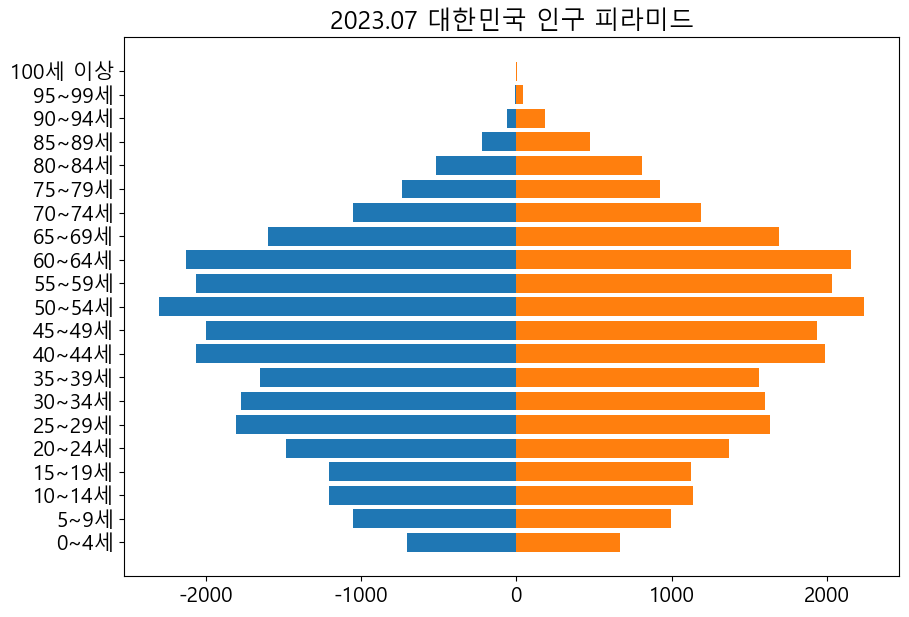

In [11]:
# 남자 데이터 시각화 (막대그래프)
plt.figure(figsize = (10,7)) # 그래프 사이즈를 키움
plt.barh(df_m.columns,-df_m.iloc[0] // 1000) # //1000 => 단위를 1000명을 기준으로 함// df_m.iloc 앞에 -를 붙임으로써 좌우반전
plt.barh(df_w.columns,df_w.iloc[0] // 1000)
plt.title('2023.07 대한민국 인구 피라미드')
plt.savefig('2023.07 대한민국 인구 피라미드.png', dpi = 100)